<a href="https://colab.research.google.com/github/Snizhana-DA/Sales-Data-Analysis-with-Python/blob/main/Exploratory_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data overview

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker
# Connecting Google Drive
from google.colab import drive
drive.mount("/content/drive")
%cd /content/drive/MyDrive/Pandas
# Uploading dataset countries
con_df = pd.read_csv("countries.csv")
con_df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Pandas


,name,alpha-2,alpha-3,region,sub-region
0,Afghanistan,AF,AFG,Asia,Southern Asia
1,Åland Islands,AX,ALA,Europe,Northern Europe
2,Albania,AL,ALB,Europe,Southern Europe
3,Algeria,DZ,DZA,Africa,Northern Africa
4,American Samoa,AS,ASM,Oceania,Polynesia


In [ ]:
# Uploading dataset events
ev_df = pd.read_csv("events.csv")
ev_df.head()

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost
0,100640618,10/8/2014,10/18/2014,M,NOR,2103,Online,650.0,205.70,117.11
1,100983083,8/11/2016,8/11/2016,C,SRB,2103,Offline,1993.0,205.70,117.11
2,101025998,7/18/2014,8/11/2014,M,NaN,7940,Online,4693.0,668.27,502.54
3,102230632,5/13/2017,6/13/2017,L,MNE,2455,Online,1171.0,109.28,35.84
4,103435266,8/11/2012,9/18/2012,H,SRB,1270,Offline,7648.0,47.45,31.79


In [ ]:
# Uploading dataset products
pr_df = pd.read_csv("products.csv")
pr_df.head()

,id,item_type
0,2103,Cereal
1,7940,Household
2,2455,Clothes
3,1270,Beverages
4,8681,Office Supplies


**Висновок:**
В датасеті представлено три таблиці, кожна з яких містить важливу інформацію для аналізу.
- *Таблиця “Countries”*
Ця таблиця містить інформацію про країни, а саме: Назва країни, Код альфа-2,	Код альфа-3,	Регіон та Субрегіон.
- *Таблиця “Events”*
У таблиці подано дані про замовлення. Колонки включають: Номер замовлення (Order ID), Дата замовлення (Order Date), Дата відправлення замовлення (Ship Date), Код країни (Country Code),	ID продукту (Product ID),	Канал продажу (Sales Channel), Кількість проданих одиниць (Units Sold), Ціна за одиницю (Unit Price) та Собівартість одиниці (Unit Cost).
Таблиця “Events” пов’язана з таблицею “Countries” через колонку Country Code, яка відповідає колонці Alpha-3 у таблиці “Countries”.
- *Таблиця “Products”*
Ця таблиця містить дані про продукти: ID продукту (ID) та Тип продукту (Item Type). Таблиця “Products” пов’язана з таблицею “Events” через колонку ID, яка відповідає колонці Product ID у таблиці “Events”.

Таким чином, всі три таблиці пов’язані між собою через спільні ключі, що дозволяє проводити комплексний аналіз даних на основі країн, замовлень та характеристик продуктів.


# Data cleaning

In [ ]:
# Viewing data information
con_df.info()
ev_df.info()
pr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        249 non-null    object
 1   alpha-2     248 non-null    object
 2   alpha-3     249 non-null    object
 3   region      248 non-null    object
 4   sub-region  248 non-null    object
dtypes: object(5)
memory usage: 9.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        1330 non-null   int64  
 1   Order Date      1330 non-null   object 
 2   Ship Date       1330 non-null   object 
 3   Order Priority  1330 non-null   object 
 4   Country Code    1248 non-null   object 
 5   Product ID      1330 non-null   int64  
 6   Sales Channel   1330 non-null   object 
 7   Units Sold      1328 non-null   float64
 8   Unit Price    

In [ ]:
# Counting missing value
print(con_df.isna().sum())
print(ev_df.isna().sum())

name          0
alpha-2       1
alpha-3       0
region        1
sub-region    1
dtype: int64
Order ID           0
Order Date         0
Ship Date          0
Order Priority     0
Country Code      82
Product ID         0
Sales Channel      0
Units Sold         2
Unit Price         0
Unit Cost          0
dtype: int64


In [ ]:
# Converting all string values
con_df[:] = con_df.applymap(lambda x: x.title() if isinstance(x, str) else x)
ev_df[:] = ev_df.applymap(lambda x: x.title() if isinstance(x, str) else x)
pr_df[:] = pr_df.applymap(lambda x: x.title() if isinstance(x, str) else x)

<ipython-input-7-00dff9c30bb8>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  con_df[:] = con_df.applymap(lambda x: x.title() if isinstance(x, str) else x)
<ipython-input-7-00dff9c30bb8>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ev_df[:] = ev_df.applymap(lambda x: x.title() if isinstance(x, str) else x)
<ipython-input-7-00dff9c30bb8>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pr_df[:] = pr_df.applymap(lambda x: x.title() if isinstance(x, str) else x)


In [ ]:
# Checking for dublicates
duplicate_rows = con_df.duplicated()
print(duplicate_rows.sum())
duplicate_rows = ev_df.duplicated()
print(duplicate_rows.sum())
duplicate_rows = pr_df.duplicated()
print(duplicate_rows.sum())

0
0
0


**Висновок:**
- Таблиця “Countries”. У таблиці є пропущені значення в стовпцях Region, Subregion та Alpha-2. Ці пропуски потребують обробки для забезпечення цілісності даних. Для подальшого аналізу, нам знадобиться використання даних стовпця Alpha3, тому недоцільно видаляти ці рядки, пропуски заповнимо значенням Unknown.
-	Таблиця “Events”. У цій таблиці також є пропущені значення в певних стовпцях, які необхідно ідентифікувати та обробити. Через велику кількість пропусків у стовпці Country Code заповнимо їх значенням Unknown, а рядки з пропущеним значенням в стовпці Unit Sold — видалимо. Крім того, стовпці Order Date та Ship Date мають тип даних object. Їх потрібно перетворити у формат datetime для зручності подальшого аналізу.
- Таблиця “Products”. У цій таблиці відсутні пропущені значення. Дані мають відповідний формат і не потребують додаткового очищення.

В усіх трьох таблицях відсутні дублікати, тому дані не потребують додаткового очищення. Таким чином, необхідно зосередитися на обробці пропущених значень у таблицях “Countries” та “Events”, а також змінити тип даних для дат у таблиці “Events”. Таблиця “Products” готова до аналізу.

In [ ]:
# Filling gaps with "Unknown"
con_df.fillna("Unknown", inplace=True)

In [ ]:
# Filling gaps in the "Country Code" column with "Unknown"
ev_df["Country Code"].fillna("Unknown", inplace=True)

<ipython-input-10-782c54b53af9>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ev_df["Country Code"].fillna("Unknown", inplace=True)


In [ ]:
# Deleting rows that contain gaps in the "Units Sold" column
ev_df.dropna(subset=["Units Sold"], inplace=True)

In [ ]:
# Data researching for anomalies
ev_df.describe()

,Order ID,Product ID,Units Sold,Unit Price,Unit Cost
count,1.328000e+03,1328.000000,1328.000000,1328.000000,1328.000000
mean,5.416231e+08,5787.775602,4952.201807,264.913245,187.211521
std,2.573496e+08,2820.635702,2905.198996,217.386320,176.187801
min,1.006406e+08,1270.000000,2.000000,9.330000,6.920000
25%,3.213291e+08,3127.000000,2356.750000,81.730000,35.840000
50%,5.399925e+08,5988.000000,4962.000000,154.060000,97.440000
75%,7.547357e+08,8681.000000,7459.500000,437.200000,263.330000
max,9.998797e+08,8969.000000,9999.000000,668.270000,524.960000


**Висновок:**

*Перевірка мінімальних і максимальних значень щодо наявності аномалій*
- Units Sold: Мінімальне значення: 2 — це дуже низьке значення для обсягів продажу, якщо мова йде про великі операції. Максимальне значення: 9999 — порівняно високе.
- Unit Price: Мінімальне значення ціни за одиницю - 9.33, а максимальне значення - 668.27, здаються реалістичними.  
- Unit Cost: Мінімальне значення: 6.92 — досить низьке значення.	Максимальне значення: 524.96 — виглядає реалістично.

*Можливі причини аномалій*
- Різноманітність даних. Дані можуть включати транзакції з дуже різними обсягами продажів або цінами залежно від типу продукту чи клієнта.
- Реальні виняткові події. Наприклад, велике замовлення або надто низькі ціни через знижки.



In [ ]:
# Transformation date colums to datetime format
ev_df["Order Date"] = pd.to_datetime(ev_df["Order Date"])
ev_df["Ship Date"] = pd.to_datetime(ev_df["Ship Date"])

# Data analysis and visualization

## Об’єднання трьох таблиць в один датафрейм.

In [ ]:
# Rename colomns
con_df.rename(columns={'alpha-3':'Country Code'}, inplace=True)
pr_df.rename(columns={'id':'Product ID'}, inplace=True)

In [ ]:
# Performing join Events, Counrties and Products
ev_con = pd.merge(ev_df, con_df, on="Country Code", how="left")
df = pd.merge(ev_con, pr_df, on="Product ID", how="left")
print(df)

       Order ID Order Date  Ship Date Order Priority Country Code  Product ID  \
0     100640618 2014-10-08 2014-10-18              M          Nor        2103   
1     100983083 2016-08-11 2016-08-11              C          Srb        2103   
2     101025998 2014-07-18 2014-08-11              M      Unknown        7940   
3     102230632 2017-05-13 2017-06-13              L          Mne        2455   
4     103435266 2012-08-11 2012-09-18              H          Srb        1270   
...         ...        ...        ...            ...          ...         ...   
1323  994504153 2017-01-10 2017-01-13              M          Swe        4594   
1324  994978797 2014-12-05 2015-01-02              H          Ita        1270   
1325  996754205 2010-09-20 2010-09-22              L          Rus        7331   
1326  998043382 2010-06-15 2010-07-03              H          Mlt        8293   
1327  999879729 2012-03-31 2012-05-06              M          Alb        7940   

     Sales Channel  Units S

In [ ]:
# Filling gaps with "Unknown"
df.fillna("Unknown", inplace=True)
print(df)

       Order ID Order Date  Ship Date Order Priority Country Code  Product ID  \
0     100640618 2014-10-08 2014-10-18              M          Nor        2103   
1     100983083 2016-08-11 2016-08-11              C          Srb        2103   
2     101025998 2014-07-18 2014-08-11              M      Unknown        7940   
3     102230632 2017-05-13 2017-06-13              L          Mne        2455   
4     103435266 2012-08-11 2012-09-18              H          Srb        1270   
...         ...        ...        ...            ...          ...         ...   
1323  994504153 2017-01-10 2017-01-13              M          Swe        4594   
1324  994978797 2014-12-05 2015-01-02              H          Ita        1270   
1325  996754205 2010-09-20 2010-09-22              L          Rus        7331   
1326  998043382 2010-06-15 2010-07-03              H          Mlt        8293   
1327  999879729 2012-03-31 2012-05-06              M          Alb        7940   

     Sales Channel  Units S

In [ ]:
# Deleting unnesessary columns for calculations
df.drop(columns=["alpha-2", "Order Priority"])

,Order ID,Order Date,Ship Date,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost,name,region,sub-region,item_type
0,100640618,2014-10-08,2014-10-18,Nor,2103,Online,650.0,205.70,117.11,Norway,Europe,Northern Europe,Cereal
1,100983083,2016-08-11,2016-08-11,Srb,2103,Offline,1993.0,205.70,117.11,Serbia,Europe,Southern Europe,Cereal
2,101025998,2014-07-18,2014-08-11,Unknown,7940,Online,4693.0,668.27,502.54,Unknown,Unknown,Unknown,Household
3,102230632,2017-05-13,2017-06-13,Mne,2455,Online,1171.0,109.28,35.84,Montenegro,Europe,Southern Europe,Clothes
4,103435266,2012-08-11,2012-09-18,Srb,1270,Offline,7648.0,47.45,31.79,Serbia,Europe,Southern Europe,Beverages
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1323,994504153,2017-01-10,2017-01-13,Swe,4594,Online,4734.0,9.33,6.92,Sweden,Europe,Northern Europe,Fruits
1324,994978797,2014-12-05,2015-01-02,Ita,1270,Offline,5192.0,47.45,31.79,Italy,Europe,Southern Europe,Beverages
1325,996754205,2010-09-20,2010-09-22,Rus,7331,Offline,574.0,255.28,159.42,Russia,Europe,Eastern Europe,Baby Food
1326,998043382,2010-06-15,2010-07-03,Mlt,8293,Online,2070.0,437.20,263.33,Malta,Europe,Southern Europe,Cosmetics


## Ключові метрики діяльності компанії.

In [ ]:
# Metrics
df["Revenue"] = df["Unit Price"] * df["Units Sold"]
df["Cost"] = df["Unit Cost"] * df["Units Sold"]
df["Profit"] = df["Revenue"] - df["Cost"]

In [ ]:
# Total orders count
print(f"Total orders count: {df['Order ID'].nunique()}")
# Total profit
print(f"Total profit: {df['Profit'].sum()}")
# Total countries count
print(f"Total countries count: {df[df['Country Code'] != 'Unknown']['Country Code'].nunique()}")
# Categories count
print(f"Total categories count: {df['item_type'].nunique()}")


Total orders count: 1328
Total profit: 501434459.0
Total countries count: 45
Total categories count: 12


## Аналіз продажів.

### В розрізі категорій товарів.

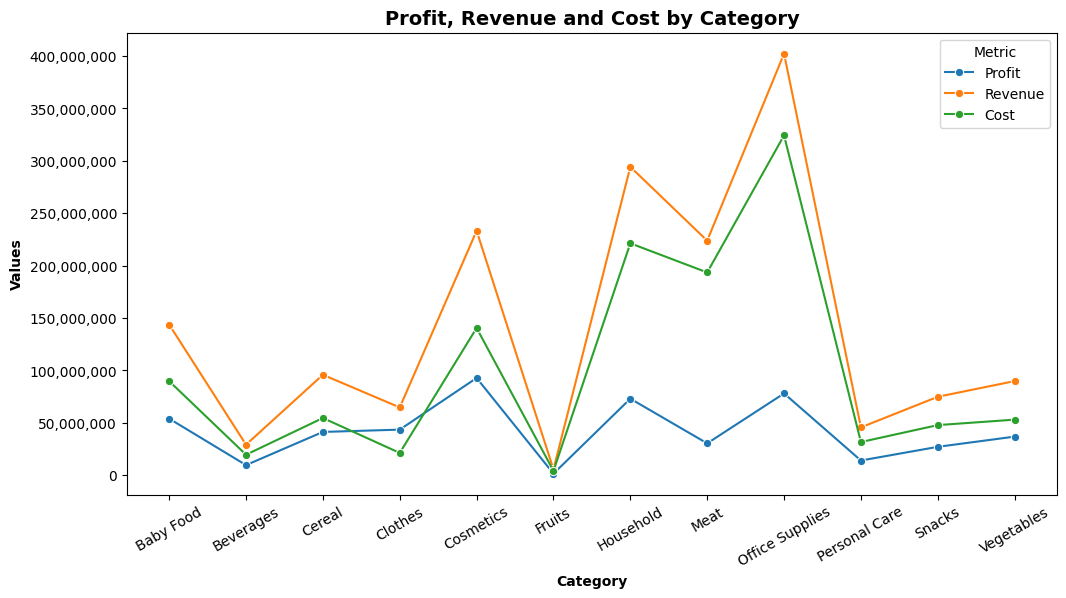

In [ ]:
# Grouping by Category
grouped_by_category = df.groupby("item_type")[["Profit", "Revenue", "Cost"]].sum().reset_index()
# Transformation data to "long" format
long_data = grouped_by_category.melt(id_vars="item_type", value_vars=["Profit", "Revenue", "Cost"], var_name="Metric", value_name="Value")
# Creating a line chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=long_data, x="item_type", y="Value", hue="Metric", marker="o")
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.title("Profit, Revenue and Cost by Category", fontsize=14, fontweight="bold")
plt.xticks(rotation=30)
plt.xlabel("Category", fontweight="bold")
plt.ylabel("Values", fontweight="bold")
plt.show()


**Висновок:**
- Категорія Office Supplies — найпопулярніша категорія, оскільки має найвищі доходи, витрати та прибутки. Високий прибуток свідчить про ефективну рентабельність цієї категорії.
- Категорії Household, Cosmetics, Meat, і Baby Food займають високі позиції, але поступаються лідеру.
- Категорії, такі як Beverages і Fruits, демонструють найнижчі показники популярності, враховуючи їхні невеликі доходи.

*Залежність між доходом, витратами і прибутком:*
- Категорії з високим доходом мають відповідно високі витрати, але співвідношення доходу та витрат забезпечує значний прибуток для категорії Office Supplies.
- Категорії Household і Baby Food займають середні позиції за всіма показниками. Вони демонструють стабільний дохід і прибуток із помірними витратами.
- Категорія Cosmetics характеризується високим прибутком при відносно низьких витратах, що свідчить про високу маржинальність.
- Категорія Clothes демонструє прибуток, що перевищує витрати, що вказує на її рентабельність. Ці показники свідчать про добре налагоджену операційну ефективність.

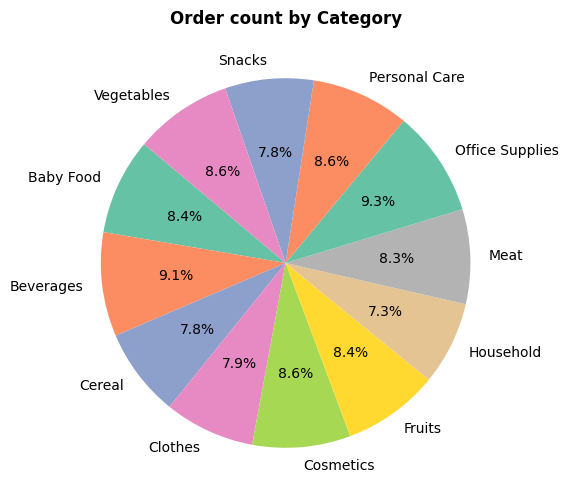

In [ ]:
# Grouping by Category
grouped_by_order_cnt = df.groupby("item_type")["Order ID"].count().reset_index()
# Creating a pie chart
plt.figure(figsize=(6, 6))
plt.pie(grouped_by_order_cnt['Order ID'],         # Значення для секторів
    labels=grouped_by_order_cnt['item_type'],          # Підписи для секторів
    autopct='%1.1f%%',              # Відображення відсотків
    startangle=140,                 # Початковий кут для першого сектора
    colors=plt.cm.Set2.colors)     # Задаємо кольори
plt.title("Order count by Category", fontweight = "bold")
plt.show()

**Висновок:**  За кількістю замовлень, категорії Beverages і  Office Supplies є найбільш популярними, з часткою 9.1% та 9.3% від загальної кількості замовлень. Категорії  Meat, Fruits, Baby Food, Personal Care, Vegetables і Cosmetics також мають значний внесок, із частками 8.3%-8.6%. Інші категорії, такі як Snacks, Household, Clothes та Cereal, мають частку від 7.3% до 7.9%. Таким чином, найпопулярнішими є категорії Beverages і  Office Supplies, а найменш популярна категорія Household, однак різниця в кількості замовлень незначна, що свідчить про рівномірний розподіл популярності серед категорій товарів.


### В розрізі географії.

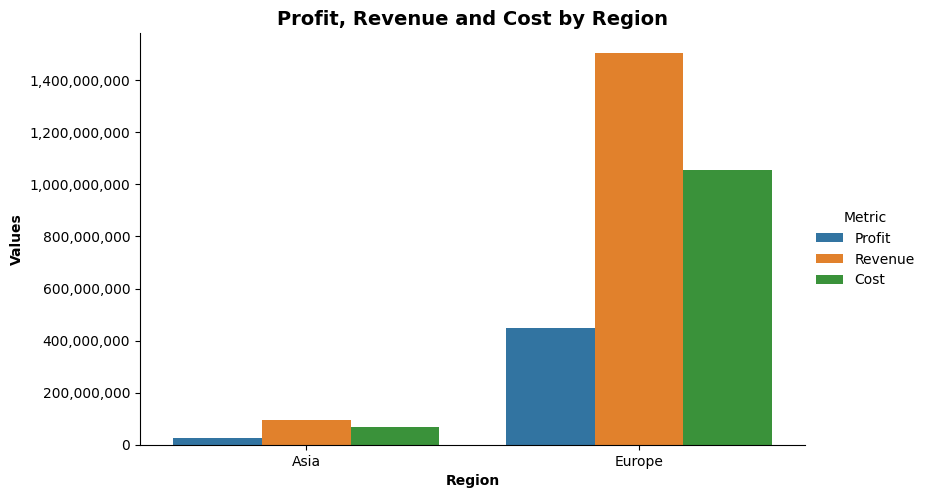

In [ ]:
# Grouping by region
grouped_by_region = df.groupby("region")[["Profit", "Revenue", "Cost"]].sum().reset_index()
grouped_by_region = grouped_by_region[grouped_by_region["region"] != "Unknown"]
# Transformation data to "long" format
long_data = grouped_by_region.melt(id_vars="region", value_vars=["Profit", "Revenue", "Cost"], var_name="Metric", value_name="Value")
# Creating bar a chart
sns.catplot(x="region", y="Value", hue="Metric", kind="bar", data=long_data, height=5, aspect=1.5)
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.title("Profit, Revenue and Cost by Region", fontsize=14, fontweight="bold")
plt.xlabel("Region", fontweight="bold")
plt.ylabel("Values", fontweight="bold")
plt.show()

**Висновок:**Регіон Європа є ключовим ринком компанії, де спостерігається найбільша кількість замовлень та активність клієнтів. Регіон з меншою активністю – Азія. Діяльність у цьому регіоні значно нижча порівняно з Європою.

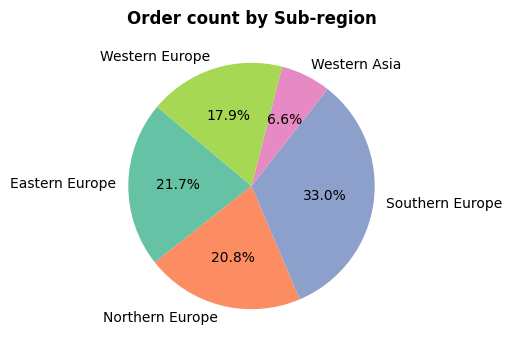

In [ ]:
# Grouping by sub-region
grouped_by_region = df.groupby("sub-region")["Order ID"].count().reset_index()
grouped_by_region = grouped_by_region[grouped_by_region["sub-region"] != "Unknown"]
# Creating a pie chart
plt.figure(figsize=(4, 4))
plt.pie(grouped_by_region['Order ID'],         # Значення для секторів
    labels=grouped_by_region['sub-region'],          # Підписи для секторів
    autopct='%1.1f%%',              # Відображення відсотків
    startangle=140,                 # Початковий кут для першого сектора
    colors=plt.cm.Set2.colors)     # Задаємо кольори
plt.title("Order count by Sub-region", fontweight = "bold")
plt.show()

**Висновок:** Країни Південної Європи демонструють найбільшу активність та популярність продукції компанії в цьому регіоні. Ринки Східної, Північної та Західної Європи демонструють стабільний середній рівень продажів. Це вказує на хороший, але ще не повністю реалізований потенціал. У Західній Азії активність компанії є найнижчою.

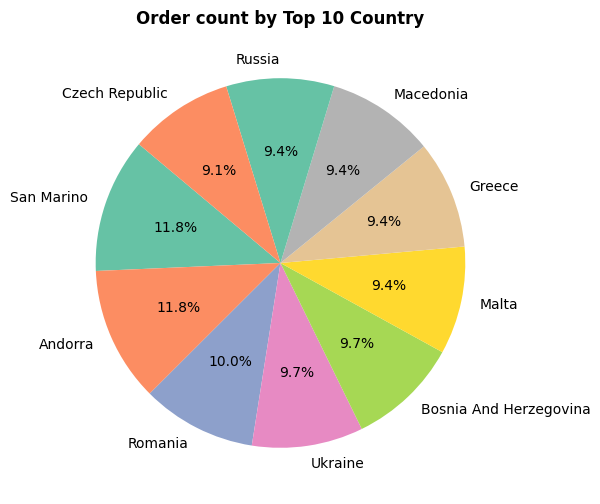

In [ ]:
# Grouping by Countries
grouped_by_country = df.groupby("name")["Order ID"].count().reset_index()
grouped_by_country = grouped_by_country[grouped_by_country["name"] != "Unknown"]
top_10_country = grouped_by_country.sort_values(by="Order ID", ascending=False).head(10)
# Creating a pie chart
plt.figure(figsize=(6, 6))
plt.pie(top_10_country['Order ID'],         # Значення для секторів
    labels=top_10_country['name'],          # Підписи для секторів
    autopct='%1.1f%%',              # Відображення відсотків
    startangle=140,                 # Початковий кут для першого сектора
    colors=plt.cm.Set2.colors)     # Задаємо кольори
plt.title("Order count by Top 10 Country", fontweight = "bold")
plt.show()

In [ ]:
# Creating a pivot table to sum Revenue, Cost and Profit by Country
filtered_df = df[df["name"] != "Unknown"]
pivot_table = pd.pivot_table(filtered_df, values=["Revenue", "Cost", "Profit"], index="name", aggfunc="sum")
print(pivot_table.sort_values(by="Profit", ascending=False))


                               Cost       Profit      Revenue
name                                                         
Andorra                 32346656.54  15410036.63  47756693.17
Ukraine                 38447391.80  14804925.74  53252317.54
Malta                   32535192.93  14610127.88  47145320.81
San Marino              34090715.67  13792992.81  47883708.48
Hungary                 28622018.09  13786231.03  42408249.12
Macedonia               35537985.30  13684099.95  49222085.25
Czech Republic          39908338.36  13635593.78  53543932.14
Russia                  32783977.17  13267682.64  46051659.81
Bosnia And Herzegovina  36859905.72  13257602.77  50117508.49
Greece                  26375091.57  12324450.13  38699541.70
Slovenia                26769006.75  12123524.52  38892531.27
Slovakia                30888208.29  12052790.03  42940998.32
Serbia                  30340023.36  11853514.38  42193537.74
Belarus                 22383839.72  11852421.05  34236260.77
Germany 

**Висновок:**
Найвищі показники доходу спостерігаються у таких країнах, як Андора, Україна, Сан-Марино, Мальта, Угорщина та Македонія. Ці країни демонструють стабільно високий рівень. Дохід у цих країнах значно перевищує середній показник. Країни з середнім рівнем доходу, такі як Чехія, Росія, Боснія та Герцоговина, Греція, Словенія, Словаччина та  Сербія характеризуються стабільними показниками діяльності. Найнижчі показники в Монако, Грузії та Нідерландах.

### В розрізі каналів продажу.

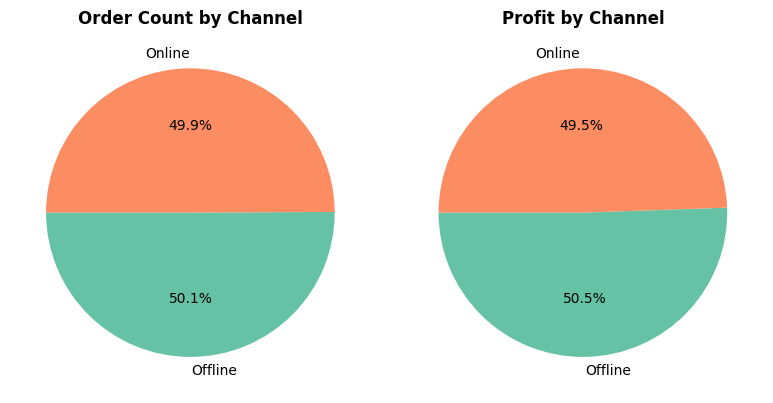

In [ ]:
# Grouping by Channel
grouped_by_channel = df.groupby("Sales Channel")["Order ID"].count().reset_index()  # Кількість замовлень
grouped_by_channel1 = df.groupby("Sales Channel")["Profit"].sum().reset_index()    # Прибуток
# Create a figure with 1 row and 2 columns of subplots
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
# First subplot - Pie plot
ax[0].pie(
    grouped_by_channel['Order ID'],           # Значення для секторів
    labels=grouped_by_channel['Sales Channel'],  # Підписи для секторів
    autopct='%1.1f%%',                        # Відображення відсотків
    startangle=180,                           # Початковий кут для першого сектора
    colors=plt.cm.Set2.colors                # Кольори секторів
)
ax[0].set_title("Order Count by Channel", fontweight="bold")  # Заголовок першого підграфіка
# Second subplot - Pie plot
ax[1].pie(
    grouped_by_channel1['Profit'],            # Значення для секторів
    labels=grouped_by_channel1['Sales Channel'],  # Підписи для секторів
    autopct='%1.1f%%',                        # Відображення відсотків
    startangle=180,                           # Початковий кут для першого сектора
    colors=plt.cm.Set2.colors                # Кольори секторів
)
ax[1].set_title("Profit by Channel", fontweight="bold")  # Заголовок другого підграфіка
plt.tight_layout()
plt.show()


**Висновок:** Канал офлайн показує трохи більшу кількість замовлень, ніж онлайн. Однак, кількість замовлень через канал онлайн практично не поступається офлайн-продажам. Різниця між каналами онлайн та офлайн за показниками доходу також є незначною. Це свідчить про збалансованість та ефективність обох каналів продажу. Продажі через онлайн та офлайн канали демонструють практично однакову ефективність.

## Аналіз інтервалу часу між замовленням та його відвантаженням.

### В розрізі категорій товарів.

In [ ]:
# Adding Time interval to the DataFrame
df["Time interval"] = (df["Ship Date"] - df["Order Date"]) / pd.Timedelta('1D')

In [ ]:
# Creating a pivot table to sum of Time interval by Category
filtered_df = df[df["item_type"] != "Unknown"]
pivot_table = pd.pivot_table(filtered_df, values=["Time interval", "Profit"], index="item_type", aggfunc="sum")
print(pivot_table.sort_values(by="Time interval", ascending=False))

                      Profit  Time interval
item_type                                  
Office Supplies  77977176.25         3285.0
Cosmetics        92723306.17         2954.0
Baby Food        53940997.16         2950.0
Beverages         9601662.78         2919.0
Meat             30337736.00         2850.0
Cereal           41255034.15         2800.0
Fruits            1425929.52         2735.0
Vegetables       36776002.72         2678.0
Snacks           27027422.40         2631.0
Clothes          43431314.40         2426.0
Personal Care    13975410.68         2367.0
Household        72962466.77         2322.0


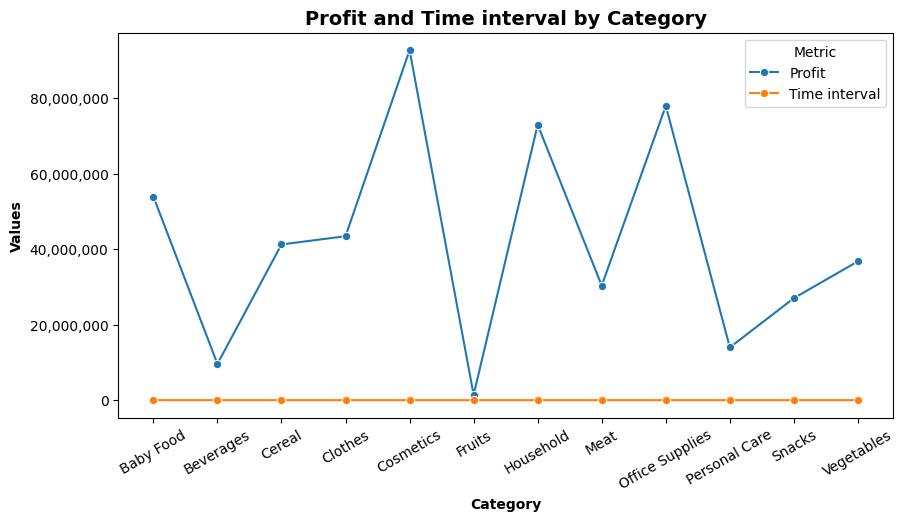

In [ ]:
# Grouping by Category
grouped_by_category = df.groupby("item_type")[["Profit", "Time interval"]].sum().reset_index()
# Transformation data to "long" format
long_data = grouped_by_category.melt(id_vars="item_type", value_vars=["Profit", "Time interval"], var_name="Metric", value_name="Value")
# Creating a line chart
plt.figure(figsize=(10, 5))
sns.lineplot(data=long_data, x="item_type", y="Value", hue="Metric", marker="o")
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation=30)
plt.title("Profit and Time interval by Category", fontsize=14, fontweight="bold")
plt.xlabel("Category", fontweight="bold")
plt.ylabel("Values", fontweight="bold")
plt.show()

**Висновок:** Категорії Office Supplies Cosmetics, і Baby Food демонструють найбільший проміжок часу між моментом оформлення замовлення та його відправленням. Для таких категорій, як Beverages, Meat та інших спостерігається поступове скорочення інтервалу часу. Household, Personal Care Clothes  демонструють найшвидший час обробки замовлень і відправлення. Суттєвих відмінностей у тривалості інтервалів часу часу між замовленням і його відправленням в розрізі категорій не спостерігається. Це свідчить про стабільну логістичну систему компанії. Лінійноі залежності показників прибутку від проміжку часу між моментом оформлення замовлення та його відправленням  в розрізі категорій не спостерігається.

### В розрізі країн.

In [ ]:
# Creating a pivot table to sum of Time interval by Country
filtered_df = df[df["name"] != "Unknown"]
pivot_table = pd.pivot_table(filtered_df, values=["Time interval", "Profit"], index="name", aggfunc="mean")
print(pivot_table.sort_values(by="Time interval", ascending=False))

                               Profit  Time interval
name                                                
Hungary                 551449.241200      32.640000
Georgia                 247725.183043      29.695652
Austria                 358125.344286      28.500000
Slovakia                401759.667667      28.466667
Luxembourg              352527.361071      27.750000
Lithuania               319891.913200      27.560000
Poland                  381110.749643      27.464286
Russia                  414615.082500      27.375000
Monaco                  369003.751538      26.846154
Bulgaria                346944.753667      26.800000
Montenegro              398916.448571      26.678571
Netherlands             240103.779167      26.625000
Belgium                 287540.774615      26.538462
Spain                   320086.960800      26.440000
France                  417013.294615      26.423077
Andorra                 385250.915750      26.275000
Finland                 327189.688261      26.

**Висновок:**
Інтервал часу між замовленням та його відправленням демонструє незначні відмінності між країнами. Найбільший інтервал часу між замовленням та його відправленням спостерігається в таких країнах, як Угорщина, Грузія, Австрія, Словаччина, Люксембург, Литва, Польща. Найшвидший інтервал часу зафіксовано в таких країнах, як Хорватія Англія, Данія, Естонія, Сербія, Латвія. Загалом різниця між країнами не є суттєвою. Лінійноі залежності показників прибутку від проміжку часу між моментом оформлення замовлення та його відправленням в розрізі країн не спостерігається.

### В розрізі регіонів.

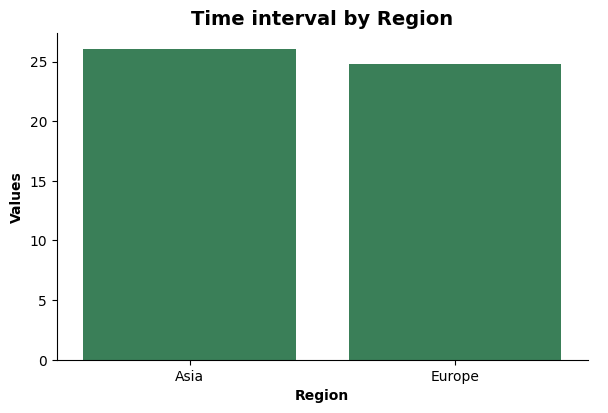

In [ ]:
# Grouping by Time interval and Region
grouped_by_region = df.groupby("region")[["Time interval"]].mean().reset_index()
grouped_by_region = grouped_by_region[grouped_by_region["region"] != "Unknown"]
# Creating a bar chart
sns.catplot(x="region", y="Time interval", kind="bar", data=grouped_by_region, height=4, aspect=1.5, color="seagreen")
plt.title("Time interval by Region", fontsize=14, fontweight="bold")
plt.xlabel("Region", fontweight="bold")
plt.ylabel("Values", fontweight="bold")
plt.show()

**Висновок:**
 В розрізі регіонів відмінності в інтервалі часу між замовленням і його відправленням незначні, що знову вказує на ефективно налагоджену логістику компанії. В регіоні Азія середнє значення інтервалу часу між замовленням і його відправленням трохи більше, ніж в регіоні Європа. Лінійноі залежності показників прибутку від проміжку часу між моментом оформлення замовлення та його відправленням не спостерігається.


## Аналіз динаміки продажів (у часі).

### В розрізі категорій товарів.

In [ ]:
# Addind Year and Month from Order Date
df["Year"] = df["Order Date"].dt.year
df["Month"] = df["Order Date"].dt.month

In [ ]:
# Dictionary for Subcategories
subcategory_mapping = {
    "Baby Food": "Food",
    "Beverage": "Food",
    "Cereal": "Food",
    "Fruit": "Food",
    "Meat": "Food",
    "Snacks": "Food",
    "Vegetables": "Food",
    "Clothes": "Lifestyle",
    "Cosmetics": "Lifestyle",
    "Personal Care": "Lifestyle",
    "Household": "Household",
    "Office Supplies": "Office"
}
# Adding Subcategories to the DataFrame
df["Subcategory"] = df["item_type"].map(subcategory_mapping)


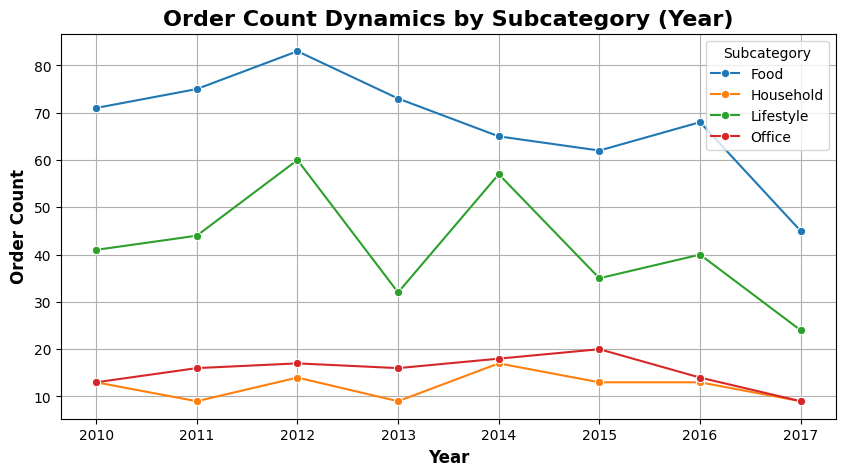

In [ ]:
# Grouping by Subcategories
subcategory_trend = df.groupby(["Year", "Subcategory"])["Order ID"].count().reset_index()
plt.figure(figsize=(10, 5))
sns.lineplot(data=subcategory_trend, x="Year", y="Order ID", hue="Subcategory", marker="o")
plt.title("Order Count Dynamics by Subcategory (Year)", fontsize=16, fontweight="bold")
plt.xlabel("Year", fontsize=12, fontweight="bold")
plt.ylabel("Order Count", fontsize=12, fontweight="bold")
plt.legend(title="Subcategory")
plt.grid()
plt.show()

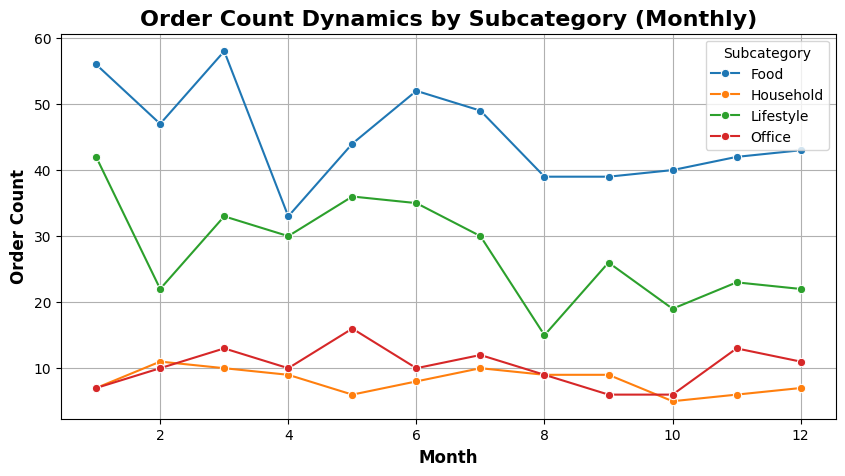

In [ ]:
# Grouping by Subcategories
subcategory_trend = df.groupby(["Month", "Subcategory"])["Order ID"].count().reset_index()
plt.figure(figsize=(10, 5))
sns.lineplot(data=subcategory_trend, x="Month", y="Order ID", hue="Subcategory", marker="o")
plt.title("Order Count Dynamics by Subcategory (Monthly)", fontsize=16, fontweight="bold")
plt.xlabel("Month", fontsize=12, fontweight="bold")
plt.ylabel("Order Count", fontsize=12, fontweight="bold")
plt.legend(title="Subcategory")
plt.grid()
plt.show()

In [ ]:
# Creating a pivot table to Order count by Category and Month
pivot_table = pd.pivot_table(df, values=["Order ID"], index="item_type", columns="Month", aggfunc="count")
print(pivot_table)

                Order ID                                            
Month                 1   2   3   4   5   6   7   8   9   10  11  12
item_type                                                           
Baby Food             16   7  13   8  13  13   6   7  12   7   4   6
Beverages              7  14  10  11   9   9  10  10  10  11   9  11
Cereal                 9  10   6   4   6  13  11   8   8  12   9   7
Clothes               15   4  11  12  13  11   7   6   8   6   8   4
Cosmetics             15   6  13   5  13  13  13   6   9   7   8   6
Fruits                10   5  15   9   8   6   9   9   8  16   9   8
Household              7  11  10   9   6   8  10   9   9   5   6   7
Meat                   8  10  10   8  10  10  10   9   6   6  11  12
Office Supplies        7  10  13  10  16  10  12   9   6   6  13  11
Personal Care         12  12   9  13  10  11  10   3   9   6   7  12
Snacks                14   9  14   6   6   7  14   6   6   6   8   7
Vegetables             9  11  15  

**Висновок:** Популярність товарів змінювалася щороку, і в кожному періоді переважали різні категорії. Це може свідчити про зміну попиту серед клієнтів, вплив ринкових тенденцій або сезонність у продажах окремих категорій.
Сезонність спостерігається лише в окремих категоріях товарів, таких як Fruits та Vegetables, де пік замовлень припадає на весняно-зимовий період. Інші категорії, як BabyFood, Beverage, Clothes та інші, не демонструють чіткої залежності від сезону, з рівномірними показниками протягом року.

### В розрізі країн.

In [ ]:
# Creating a pivot table to Profit by Country and Year
filtered_df = df[df["name"] != "Unknown"]
pivot_table = pd.pivot_table(filtered_df, values=["Profit"], index="name", columns="Year", aggfunc="sum")
print(pivot_table)


                            Profit                                      \
Year                          2010        2011        2012        2013   
name                                                                     
Albania                 2733094.76  1593784.75  1805447.26   108212.64   
Andorra                 3243222.41   677799.93  3423332.26  1205156.65   
Armenia                 1930234.67   903658.36  1179933.37   415253.58   
Austria                 3489734.81   839535.12   210537.95   651535.22   
Belarus                  773377.19  1875224.26  1872339.31  1102328.72   
Belgium                  470013.36   770912.38  1012374.70   654942.94   
Bosnia And Herzegovina   407978.70   748347.82  5708297.00  1274603.57   
Bulgaria                3159778.90   394048.32  2422474.88   259786.52   
Croatia                  692824.10    19133.58  1959755.71  3243433.04   
Cyprus                   432723.11   450242.22  3015072.06  2188047.69   
Czech Republic          1844129.49  35

**Висновок:** Протягом 2010-2017 років динаміка прибутку в країнах змінювалася. Найвищі показники прибутку спостерігалися в Австрії, Нідерландах, Ліхтенштейні, Андоррі, а також у Боснії та Герцеговині, Словенії і Македонії в різні роки. Найменші показники зазвичай були в Польщі, Норвегії, Італії, Україні, Сербії, а також відзначалася відсутність прибутку для деяких країн у різні роки. Стабільність прибутку в різних країнах змінювалася залежно від року.


### В розрізі регіонів.

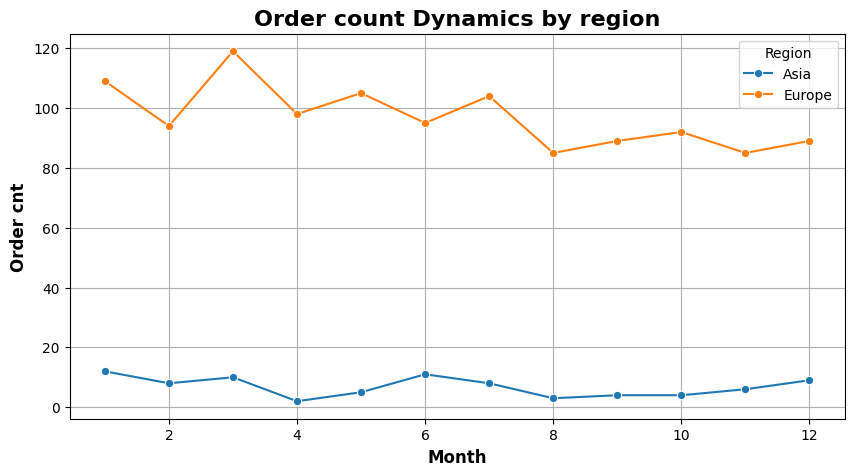

In [ ]:
# Grouping by Month and Region
region_trend = df.groupby(["Month", "region"])["Order ID"].count().reset_index()
region_trend = region_trend[region_trend["region"] != "Unknown"]
plt.figure(figsize=(10, 5))
# Creating a line chart
sns.lineplot(data=region_trend, x="Month", y="Order ID", hue="region", marker="o")
plt.title("Order count Dynamics by region", fontsize=16, fontweight="bold")
plt.xlabel("Month", fontsize=12, fontweight="bold")
plt.ylabel("Order cnt", fontsize=12, fontweight="bold")
plt.legend(title="Region")
plt.grid()
plt.show()

**Висновок:**

*Для регіону Європа:* Березень демонструє найвищі показники продажів, що свідчить про максимальну активність у цей період. Січень, травень та липень також показують високий рівень продажів. Квітень, лютий та червень мають стабільні середні показники активності, після чого спостерігається поступове зниження, з найменшими показниками в серпні, листопаді та грудні, а також відносно низьким результатом у жовтні.

*Для регіону Азія:* Для регіону Азія найбільші показники замовлень припадають на січень, червень, березень та грудень. Середні показники зафіксовані в лютому, травні, липні,  листопаді, тоді як найменша кількість замовлень була у квітні та серпні, вересні та жовтні.

 Динаміка продажів свідчить про сезонність у діяльності компанії, з піковою активністю навесні (особливо в березні) та помірною активністю влітку. Низькі показники в жовтні, квітні та серпні можуть бути пов’язані зі спадом попиту або специфікою ринку в ці періоди.




### Аналіз продажів товарів за днями тижня.

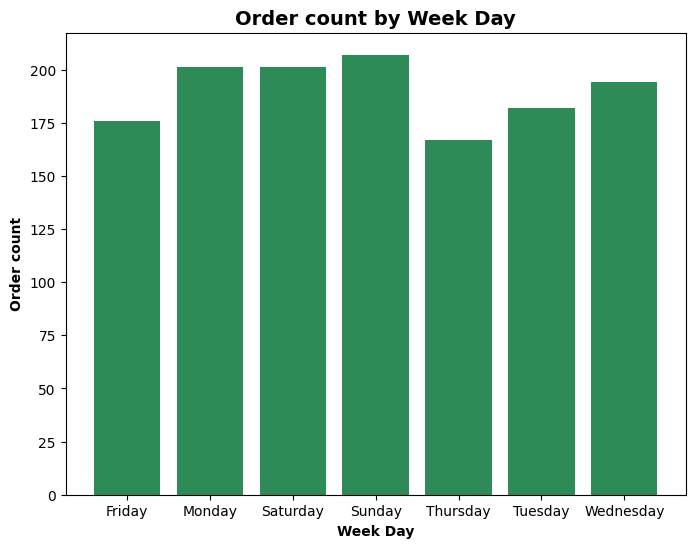

In [ ]:
# Addind day of week from Order Date(0 - Sunday, 6 - Saturday)
df["dayofweek"] = (df["Order Date"].dt.dayofweek + 1) % 7
# Addind name of week day
df["weekday_name"] = df["Order Date"].dt.day_name()
grouped_by_day = df.groupby(["weekday_name"])["Order ID"].count()
plt.figure(figsize=(8, 6))
plt.bar(grouped_by_day.index, grouped_by_day, color="seagreen")
plt.title("Order count by Week Day", fontsize=14, fontweight="bold")  # Title of the chart
plt.xlabel("Week Day", fontweight="bold")  # X-axis label
plt.ylabel("Order count", fontweight="bold")  # Y-axis label
plt.xticks(fontsize=10)  # X-axis ticks font size
plt.yticks(fontsize=10)  # Y-axis ticks font size
plt.show()

**Висновок:** Пікова активність продажів спостерігається у вихідні дні: неділя та субота. Також високі показники зафіксовані у понеділок, що свідчить про активний початок робочого тижня. Середа демонструє стабільну, середню активність продажів. Найнижча активність спостерігається в середині тижня (четвер та пятниця). Динаміка продажів за днями тижня вказує на значний вплив вихідних днів на обсяг замовлень, що може бути пов’язано зі збільшенням вільного часу у клієнтів. Активний початок тижня та помірна активність у середу свідчать про стабільність продажів у ці дні, тоді як найменші показники серед тижня можуть бути викликані рутинними обставинами у клієнтів.

# Висновки з точки зору бізнес-логіки.




З точки зору бізнес-логіки, можна зробити кілька основних **висновків**:

*Популярність категорій:*
- Office Supplies є найбільш вигідною категорією, що має високі доходи та прибутки, що свідчить про ефективну рентабельність. Важливо продовжувати акцентуватися на цьому сегменті, оскільки він генерує найбільшу частку доходів.
- Household, Cosmetics, Meat та Baby Food демонструють стабільні показники, але поступаються лідеру. Для цих категорій можна розглянути стратегії для підвищення попиту або оптимізації витрат для досягнення більшої рентабельності.
- Beverages та Fruits мають найнижчі показники, тому варто переглянути стратегії їхнього просування або проаналізувати можливі сезонні впливи для підвищення популярності.

*Залежність між доходом, витратами та прибутком:*
- Категорії з високим доходом, такі як Office Supplies, вимагають відповідних витрат, але в результаті забезпечують високий прибуток. Це підкреслює важливість підтримки ефективної стратегії витрат.
- Cosmetics відзначається високим прибутком при низьких витратах, що робить її високорентабельною категорією, і вона має значний потенціал для розширення.
- Clothes показує хорошу рентабельність, перевищуючи витрати, що свідчить про її ефективну операційну стратегію.

*Регіональні відмінності:*
- Європа є ключовим ринком, з піковими продажами в березні та активністю в січні, травні та липні. Це вказує на сезонні коливання, на які можна орієнтувати маркетингові кампанії.
- Азія демонструє нижчі показники активності, що може бути пов’язано з різними економічними або культурними особливостями.

*Продажі через канали:*
- Офлайн та онлайн канали показують майже однакову ефективність за кількістю замовлень, що вказує на важливість оптимізації обох каналів для досягнення більшої рентабельності. Це також свідчить про збалансовану стратегію продажу.

*Логістика та обробка замовлень:*
- Незначні відмінності в інтервалі часу між моментом оформлення замовлення та його відправленням вказують на ефективно налагоджену логістичну систему. Це може бути конкурентною перевагою, оскільки швидкість обробки замовлень важлива для задоволення клієнтів.
- Аналіз часу між замовленням і відправленням також свідчить про можливість покращення обробки замовлень в окремих країнах та регіонах для підвищення швидкості доставки.

*Сезонність та попит:*
- Сезонні коливання попиту в таких категоріях, як Fruits та Vegetables, вимагають адаптації стратегії продажів. Це можна використовувати для прогнозування попиту та підготовки запасів до пік сезону.
- Beverages та Clothes не демонструють чіткої сезонності, тому вони вимагають більш стабільного маркетингового підходу протягом року.

*Пікові дні продажів:*
- Вихідні дні (неділя, субота) є найбільш активними, що дозволяє сконцентрувати маркетингові кампанії і пропозиції саме на ці дні.
- Помірна активність у середу вказує на потенціал для оптимізації продажів в середині тижня, наприклад, за рахунок спеціальних пропозицій або знижок.

Таким чином, на основі цих висновків компанії можна рекомендувати зміцнити свої позиції на ключових ринках Європи, звернувши увагу на оптимізацію логістики і каналів продажу, а також впровадження стратегій для підвищення попиту в менш активних регіонах, таких як Азія.
